# HR Analytics

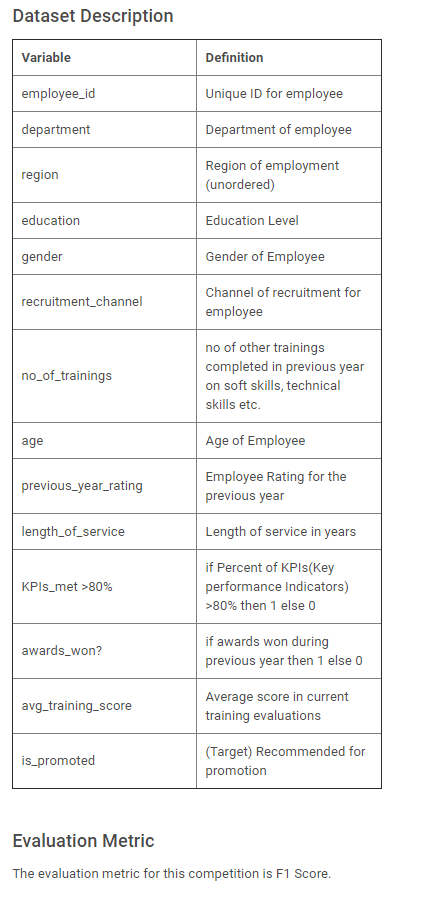

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [46]:
train=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\classification\\hr\\train.csv')
test=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\classification\\hr\\test.csv')
ss=pd.read_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\classification\\hr\\sample_submission.csv')

train.shape,test.shape,ss.shape

((54808, 14), (23490, 13), (23490, 2))

In [47]:
train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


# Check # 0: Dublicate

In [49]:
def remove_duplicate(data):
    data.drop_duplicates(keep="first", inplace=True)
    return "Checked Duplicates"

In [50]:
remove_duplicate(train)

'Checked Duplicates'

# Multivariate + Univartiate EDA

In [7]:
import dtale
dtale.show(train)
dtale.show(train, ignore_duplicate=True)

Observations:
1. previous_year_rating is null for freshers (length_of_service = 1). So we can fill that null with o

# Check # 1: Target Distribution 

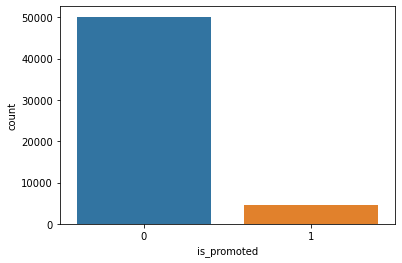

In [51]:
sb.countplot(train['is_promoted'])

This show that  only few employees were promoted. Let us check if target have any null values or not

In [52]:
train['is_promoted'].isnull().sum()

0

# Check # 2:  NaN values (%)

In [53]:
null=100*(train.isnull().sum()/train.shape[0]).round(3)
null.sort_values(ascending=False)

previous_year_rating    7.5
education               4.4
is_promoted             0.0
avg_training_score      0.0
awards_won?             0.0
KPIs_met >80%           0.0
length_of_service       0.0
age                     0.0
no_of_trainings         0.0
recruitment_channel     0.0
gender                  0.0
region                  0.0
department              0.0
employee_id             0.0
dtype: float64

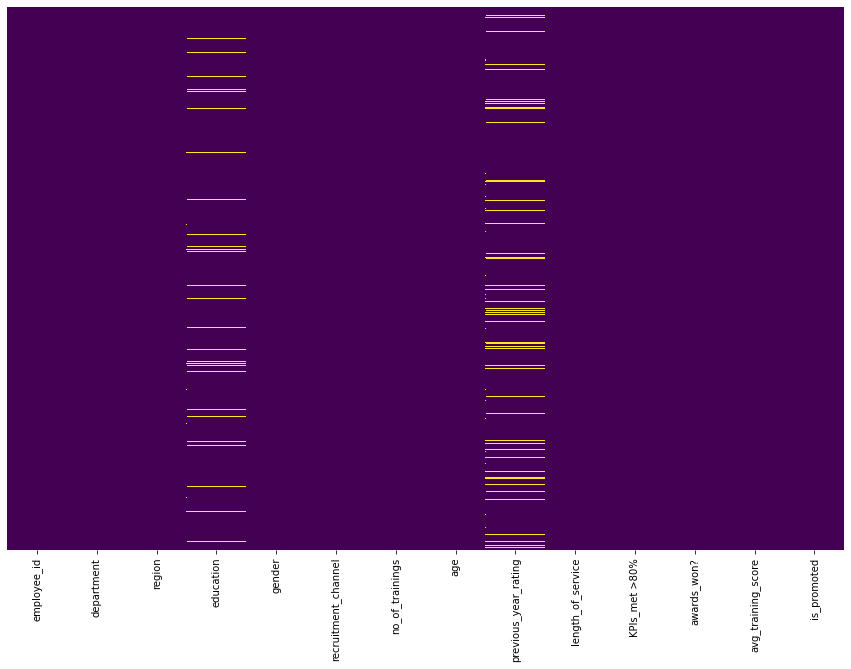

In [54]:
plt.figure(figsize=(15,10))
sb.heatmap(train.isnull(),cmap='viridis',cbar=False,yticklabels=False)

# Merge Train + Test

For faster manipulation of data, lets megre train and test data for feature engineering

In [55]:
df=pd.concat([train,test],axis=0).reset_index(drop=True)
df.shape

(78298, 14)

In [56]:
df.tail(11)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
78287,39410,Sales & Marketing,region_2,Bachelor's,m,other,3,20,NaN,1,0,0,49,NaN
78288,11837,Operations,region_33,Bachelor's,f,sourcing,1,29,5.0,6,1,0,60,NaN
78289,78278,Operations,region_22,Master's & above,m,other,2,40,5.0,3,1,0,60,NaN
78290,27284,Sales & Marketing,region_2,NaN,m,sourcing,2,44,4.0,4,0,0,49,NaN
78291,49291,Sales & Marketing,region_30,Bachelor's,m,other,1,34,3.0,5,0,0,49,NaN
78292,47537,Sales & Marketing,region_20,Bachelor's,m,other,1,28,4.0,2,0,0,51,NaN
78293,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
78294,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
78295,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
78296,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,NaN


# Categorical and Numerical features

Lets try to segregate categorical and numerical features

In [57]:
col_id = 'id'                      #id
col_y = 'term_deposit_subscribed'  #target
#src = 'source'
features = [c for c in train.columns if c not in [col_id, col_y]]
cat_cols = train.select_dtypes(include=['object'])

# categorical features
cat_cols = [c for c in features if c in cat_cols]

# numerical features
num_cols = [n for n in features if n not in cat_cols]

print('categorical variables')
display(cat_cols)
print('numerical variables')
display(num_cols)

categorical variables


['department', 'region', 'education', 'gender', 'recruitment_channel']

numerical variables


['employee_id',
 'no_of_trainings',
 'age',
 'previous_year_rating',
 'length_of_service',
 'KPIs_met >80%',
 'awards_won?',
 'avg_training_score',
 'is_promoted']

# Feature Engineering 1: Imputing missing Values

As the NaN values are very less in %, therefore lets impute by mean(numerical feature) andby forward fill (categorical feature)

In [58]:
# 0 rating for freshers
df['previous_year_rating']=df['previous_year_rating'].fillna(0)

#education data collectedin sequential order , so ffill/bfill
df['education']=df['education'].ffill(axis=0)


    

In [59]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
is_promoted             23490
dtype: int64

# Feature Engineeing 2: Handling Cat. labels


In [60]:
df = pd.get_dummies(df, columns= cat_cols,drop_first=True)

In [61]:
df.shape

(78298, 55)

In [62]:
ID_COL, TARGET_COL = 'employee_id', 'is_promoted'

In [73]:
from sklearn import preprocessing 

scaler = preprocessing.RobustScaler() 
X_standard = scaler.fit_transform(df) 
X_standard = pd.DataFrame(df, columns =df.columns)

In [74]:
X_standard.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1,35,5.0,8,1,0,49,0.0,0,...,0,0,1,0,0,0,1,0,0,1
1,65141,1,30,5.0,4,0,0,60,0.0,0,...,0,0,0,0,0,0,0,1,0,0
2,7513,1,34,3.0,7,0,0,50,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,2542,2,39,1.0,10,0,0,50,0.0,0,...,0,0,0,0,0,0,0,1,0,0
4,48945,1,45,3.0,2,0,0,73,0.0,0,...,0,0,0,0,0,0,0,1,0,0


# Processing back the Train, Test Data

Once done with manipulation of whole data, lets process back data into train and test

In [75]:
train_proc, test_proc = X_standard[:train.shape[0]], X_standard[train.shape[0]:].reset_index(drop = True)
features = [c for c in train_proc.columns if c not in [ID_COL, TARGET_COL]]

#train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)
#features = [c for c in train_proc.columns if c not in [ID_COL, TARGET_COL]]

In [76]:
train_proc.shape, test_proc.shape

((54808, 55), (23490, 55))

# Feature-Target Split

In [77]:
# Predictors
X = train_proc[features]

# Target
y = train_proc[TARGET_COL]

# Train-Test Split

In [78]:
# Dividing the data into train and test subsets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.10,
                                                 random_state=10)

In [79]:
from sklearn import svm
from sklearn.metrics                  import f1_score
from sklearn import svm
from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier

# Base Line ML model creation (classification)

In [80]:

Classifiers = {'0._XGBoost' : XGBClassifier(learning_rate =0.1,
                                            n_estimators=500,
                                            max_depth=5,
                                            subsample = 0.70,
                                            verbosity = 0,
                                            scale_pos_weight = 2.5,
                                            updater ="grow_histmaker",
                                            base_score  = 0.2),
               
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.15,
                                                 n_estimators=500,
                                                 max_depth=5,
                                                 subsample=0.085, 
                                                 scale_pos_weight=2.5),
               
               '2.LightGBM' : LGBMClassifier(learning_rate=0.15,
                                             n_estimators=500,
                                             max_depth=5,
                                             subsample_freq = 2,
                                             objective ="binary",
                                             importance_type = "gain",
                                             verbosity = -1,
                                             max_bin = 60,
                                             num_leaves = 300, 
                                             boosting_type = 'dart',
                                             scale_pos_weight=2.5)} 

In [82]:
from sklearn.ensemble import VotingClassifier

vc_model = VotingClassifier(estimators=[('XGBoost_Best', list(Classifiers.values())[0]), 
                                        ('CatBoost_Best', list(Classifiers.values())[1]),
                                        ('LightGBM_Best', list(Classifiers.values())[2]),
                                       ],
                                       voting='soft',
                                       weights=[2, 1, 3])

In [83]:
vc_model.fit(X_train,y_train)

0:	learn: 0.5583622	total: 30.1ms	remaining: 15s
1:	learn: 0.4939944	total: 57.2ms	remaining: 14.3s
2:	learn: 0.4504646	total: 78.8ms	remaining: 13.1s
3:	learn: 0.4184018	total: 101ms	remaining: 12.5s
4:	learn: 0.3984595	total: 122ms	remaining: 12.1s
5:	learn: 0.3894146	total: 144ms	remaining: 11.8s
6:	learn: 0.3717898	total: 165ms	remaining: 11.7s
7:	learn: 0.3447385	total: 187ms	remaining: 11.5s
8:	learn: 0.3403077	total: 209ms	remaining: 11.4s
9:	learn: 0.3247406	total: 231ms	remaining: 11.3s
10:	learn: 0.3231933	total: 246ms	remaining: 10.9s
11:	learn: 0.3178837	total: 266ms	remaining: 10.8s
12:	learn: 0.3095689	total: 288ms	remaining: 10.8s
13:	learn: 0.3086122	total: 310ms	remaining: 10.8s
14:	learn: 0.3068576	total: 332ms	remaining: 10.7s
15:	learn: 0.3042721	total: 355ms	remaining: 10.7s
16:	learn: 0.3035722	total: 376ms	remaining: 10.7s
17:	learn: 0.3007977	total: 398ms	remaining: 10.7s
18:	learn: 0.3002947	total: 421ms	remaining: 10.6s
19:	learn: 0.2989570	total: 438ms	remain

VotingClassifier(estimators=[('XGBoost_Best',
                              XGBClassifier(base_score=0.2, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.1,
                                            max_delta_step=None, max_depth=5,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimator...
                                            validate_parameters=None,
                                            verbosity=0)),
                             ('

In [89]:
pred=vc_model.predict(X_test)

In [90]:
from sklearn.metrics import classification_report,confusion_matrix
print("Confusion Matrix\n")
print(confusion_matrix(y_test,pred))

print('\n Metrics Report\n')
print(classification_report(y_test,pred))

Confusion Matrix

[[4902  101]
 [ 279  199]]

 Metrics Report

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      5003
         1.0       0.66      0.42      0.51       478

    accuracy                           0.93      5481
   macro avg       0.80      0.70      0.74      5481
weighted avg       0.92      0.93      0.92      5481



In [94]:
vc_model.score(X_test,y_test)

0.9306695858419997

In [95]:
from sklearn.metrics import f1_score

In [100]:
print(f1_score(pred,y_test,average='weighted'))
print(f1_score(pred,y_test,average='binary'))

0.9379948077897476
0.5115681233933161


In [102]:
test_proc.drop(["employee_id",'is_promoted'], axis=1, inplace=True)

In [103]:
ss.drop(["is_promoted"], axis=1, inplace=True)

In [104]:
X_test=test_proc
pred_final=vc_model.predict(X_test)

In [105]:
ss['is_promoted']=pred_final

In [109]:
ss['employee_id']=ss['employee_id'].astype(str)
ss['is_promoted']=ss['is_promoted'].astype(int)
ss=ss.set_index('employee_id')


KeyError: 'employee_id'

In [111]:
ss.head()

,is_promoted
employee_id,
8724,0
74430,0
72255,0
38562,0
64486,0


In [110]:
ss.tail()

,is_promoted
employee_id,
53478,0
25600,0
45409,0
1186,0
5973,1


In [113]:
ss.to_csv('C:\\Users\\Anuvrat Shukla\\Desktop\\competitions\\Analytics\\classification\\hr\\prediction1.csv')